In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn import linear_model

In [5]:
df=pd.read_csv("C:/Users/dell/Downloads/Housing.csv")

In [6]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [7]:
%matplotlib inline

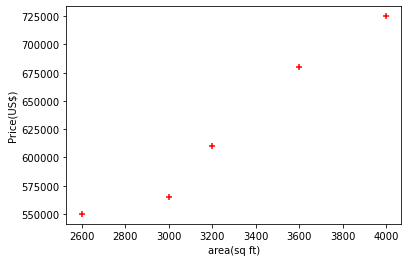

In [8]:
plt.xlabel("area(sq ft)")
plt.ylabel("Price(US$)")
plt.scatter(df.area,df.price,color="red",marker="+")

In [17]:
reg=linear_model.LinearRegression()


In [18]:
reg.fit(df[['area']],df.price)

LinearRegression()

In [20]:
reg.predict([[3300]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

## method2

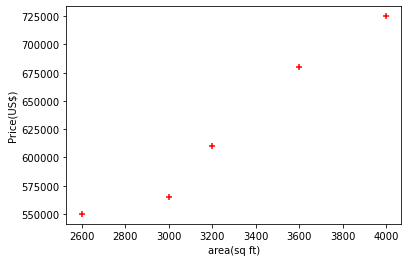

In [21]:
plt.xlabel("area(sq ft)")
plt.ylabel("Price(US$)")
plt.scatter(df.area,df.price,color="red",marker="+")

In [22]:
new_df=df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [24]:
price=df['price']
# or price=df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [30]:
#create linear regression object
reg=linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [32]:
reg.predict([[3300]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [33]:
reg.coef_

array([135.78767123])

In [34]:
reg.intercept_

180616.43835616432

### Y=mX+b 

In [36]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

## Multivariate

In [37]:
df=pd.read_csv("C:/Users/dell/Downloads/Housing.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


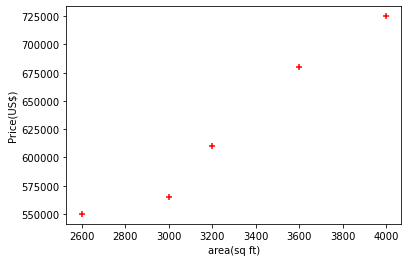

In [57]:
plt.xlabel("area(sq ft)")
plt.ylabel("Price(US$)")
plt.scatter(df.area,df.price,color="red",marker="+")

In [38]:
#Linear eqn=>m1*area + m2*bedrooms + m3*age + b

In [39]:
#y=mx1+mx2+mx3+b

In [40]:
#Data Processsing->Handling NA values
#Linear regression using multiple variables

In [41]:
df['bedrooms'].median()

3.5

In [42]:
import math

In [43]:
median_bedrooms=math.floor(df['bedrooms'].median())

In [44]:
median_bedrooms

3

In [47]:
df['bedrooms']=df['bedrooms'].fillna(median_bedrooms)

In [48]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


In [49]:
reg=linear_model.LinearRegression()
#reg.fit(indep variables,dept variables)
reg.fit(df[['area','bedrooms','age']],df['price'])

LinearRegression()

In [50]:
reg.coef_

array([  143.625, -6762.5  ,   337.5  ])

In [51]:
reg.intercept_

173112.5

In [54]:
reg.predict([[3000,3,40]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([597200.])

In [56]:
143.625*3000+3*(-6762.5)+40*337.5+173112.5

597200.0

# train_test_split

In [48]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("C:/Users/dell/Downloads/carprices.csv")

In [3]:
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


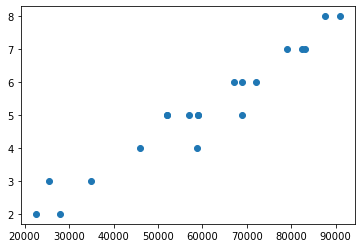

In [55]:
plt.scatter(df['Mileage'],df['Age(yrs)'])

In [56]:
x=df[['Mileage','Age(yrs)']]
y=df['Sell Price($)']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [58]:
print(X_train.shape)

(14, 2)


In [59]:
print(X_test.shape)

(6, 2)


In [60]:
print(y_test.shape)

(6,)


In [61]:
print(y_train.shape)

(14,)


In [62]:
X_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2
18,87600,8


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg=LinearRegression()

In [65]:
reg.fit(X_train,y_train)

LinearRegression()

In [66]:
reg.predict(X_test)

array([20668.52722622, 16762.33242213, 25160.18381011, 27209.30003936,
       37903.32633702, 14729.61531335])

In [67]:
y_test

7     19300
10    18700
5     26750
6     32000
3     40000
18    12800
Name: Sell Price($), dtype: int64

In [68]:
reg.score(X_test,y_test)

0.9212422483776329